### Simulate data in figure 2.9

In [26]:
import numpy as np
import scipy as scp
import pandas as pd

In [3]:
import matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


In [4]:
import seaborn as sb

In [65]:
x= np.linspace(0,100,1200)
y=3*np.sin(x/15+60)+6

<AxesSubplot:>

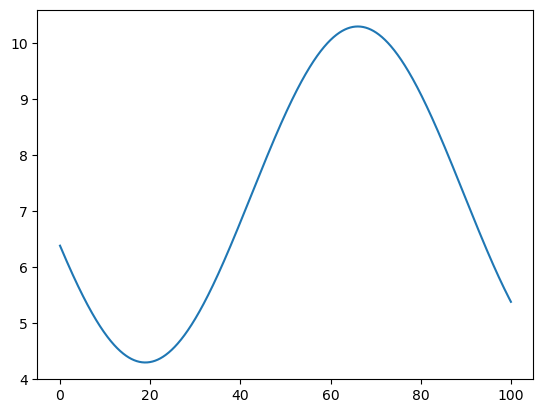

In [83]:
_=plt.figure()
ax=plt.gca()
sb.lineplot(x=x,y=y, ax=ax)

In [84]:
def f(x):
    return 3*np.sin(x/15+60)+6

In [224]:
n=100

In [225]:
x= np.linspace(0,100,100).reshape(-1,1)

In [226]:
def deal_dataset(x,n=100):
    y=(f(x) + np.random.normal(loc=0,scale=1, size=n).reshape(-1,1)).ravel()
    return y

In [227]:
datasets = [(x,deal_dataset(x)) for i in range(1000)]

<AxesSubplot:>

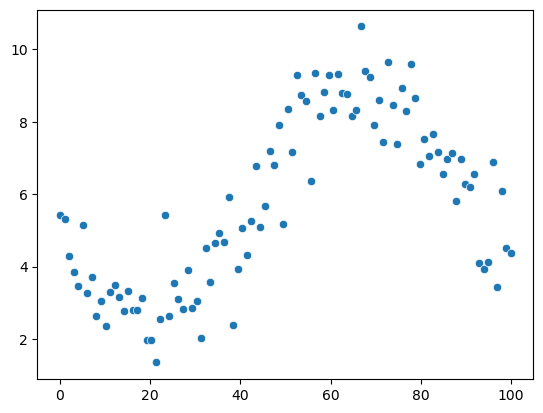

In [228]:
_=plt.figure()
ax=plt.gca()
sb.scatterplot(x=x.ravel(),y=deal_dataset(x), ax=ax)

In [229]:
from sklearn.linear_model import LinearRegression

In [230]:
yhats = []

In [231]:
avg_mses = []

In [232]:
for i in range(1000):
    lr = LinearRegression()
    lr.fit(datasets[i][0],datasets[i][1])
    yhat = lr.predict(x)
    yhats.append(yhat.reshape(-1,1))
    avg_mses.append(mse(datasets[i][1],yhat))

In [233]:
from sklearn.metrics import mean_squared_error as mse

In [234]:
yhats = np.concatenate(yhats, axis = 1)

In [235]:
np.mean(avg_mses)

3.8015427776738795

In [236]:
scp.stats.variation(avg_mses)

0.09299066350424917

In [238]:
### bias

In [245]:
y_true=f(x).ravel()

In [255]:
y_true

array([5.08556814, 4.8953794 , 4.71019789, 4.530863  , 4.35818768,
       4.19295464, 4.03591289, 3.88777428, 3.74921034, 3.62084916,
       3.5032726 , 3.39701364, 3.30255394, 3.22032168, 3.15068963,
       3.09397342, 3.05043014, 3.02025718, 3.00359131, 3.00050808,
       3.01102145, 3.03508378, 3.07258599, 3.12335808, 3.18716991,
       3.26373221, 3.35269794, 3.45366381, 3.56617216, 3.68971297,
       3.82372625, 3.96760451, 4.12069557, 4.28230546, 4.45170161,
       4.62811615, 4.8107494 , 4.99877349, 5.19133611, 5.38756438,
       5.5865688 , 5.7874473 , 5.98928929, 6.19117983, 6.39220377,
       6.59144985, 6.7880149 , 6.98100791, 7.16955404, 7.35279861,
       7.52991098, 7.70008832, 7.8625592 , 8.01658715, 8.16147397,
       8.29656289, 8.42124156, 8.53494481, 8.63715723, 8.72741549,
       8.80531045, 8.87048902, 8.92265575, 8.96157416, 8.98706784,
       8.99902123, 8.99738014, 8.98215202, 8.95340588, 8.91127204,
       8.85594149, 8.78766503, 8.70675217, 8.61356968, 8.50853

In [261]:
np.mean((y_true-np.mean(yhats,axis=1))**2)

2.8224477960586736

In [182]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

In [185]:
tree = LinearRegression()

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 3.183
Average bias: 3.072
Average variance: 0.111


<AxesSubplot:>

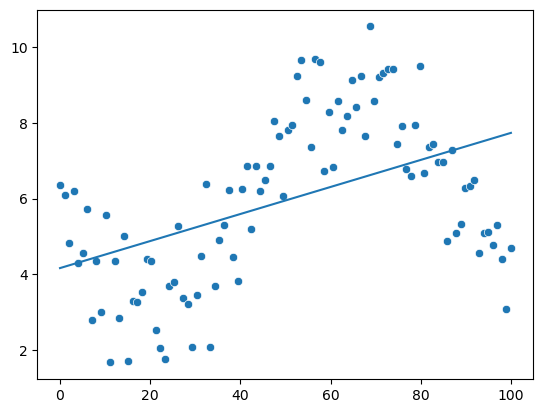

In [133]:
_=plt.figure()
ax=plt.gca()
sb.scatterplot(x=x.ravel(),y=y, ax=ax)
sb.scatterplot(x=x.ravel(),y=y, ax=ax)

sb.lineplot(x=x.ravel(),y=yhat.ravel(),ax=ax)

In [76]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
pd.Series.rolling()